In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip3 install numpy
%cd /content/drive/My Drive/sg_dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/sg_dataset


In [2]:
!pip install pytorch-pretrained-bert
!pip install transformers
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
#from transformers import tokenizer, BatchEncoding
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

     |████████████████████████████████| 123 kB 5.3 MB/s 
     |████████████████████████████████| 131 kB 47.7 MB/s 
     |████████████████████████████████| 8.0 MB 43.2 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 138 kB 60.9 MB/s 
     |████████████████████████████████| 127 kB 60.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 2.9 MB 2.4 MB/s 
     |████████████████████████████████| 3.3 MB 45.4 MB/s 
     |████████████████████████████████| 636 kB 61.4 MB/s 
     |████████████████████████████████| 895 kB 77.1 MB/s

100%|██████████| 231508/231508 [00:00<00:00, 1921975.96B/s]


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [3]:
# load data
import json

f = open('sg_train_annotations.json','r')

jsonfile= json.load(f)
print(len(jsonfile))
print(jsonfile[0])
# print(j[1].keys())
# for key in j[1]:
#   print(key, j[1][key])
# print(j[1]['relationships'][0])

relationship_dict = {}
object_dict = {}
text_to_rel = {}
rel_to_id = {}
id_to_rel = {}
for i in range(len(jsonfile)):
    for r in jsonfile[i]['relationships']:
        r_name = r['relationship']
        obj = r['text'][-1]
        if obj not in object_dict:
            object_dict[obj] = len(object_dict)
        t = ' '.join(r['text'])
        if t not in text_to_rel:
            text_to_rel[t] = r_name
        if r_name not in rel_to_id:
            rel_to_id[r_name] = len(rel_to_id)
            id_to_rel[len(id_to_rel)] = r_name
        if r_name == 'riding':
            print(r)
        relationship_dict[r_name] = relationship_dict.get(r_name, 0) + 1
print(len(relationship_dict))
print(len(text_to_rel))
print(object_dict)

4000
{'relationships': [{'text': ['car', 'has', 'front wheels'], 'objects': [0, 1], 'relationship': 'has'}, {'text': ['car', 'has', 'back wheels'], 'objects': [0, 2], 'relationship': 'has'}, {'text': ['car', 'in', 'crosswalk'], 'objects': [0, 13], 'relationship': 'in'}, {'text': ['front wheels', 'is right of', 'back wheels'], 'objects': [1, 2], 'relationship': 'right of'}, {'text': ['front wheels', 'below', 'car'], 'objects': [1, 0], 'relationship': 'below'}, {'text': ['back wheels', 'is left of', 'front wheels'], 'objects': [2, 1], 'relationship': 'left of'}, {'text': ['back wheels', 'below', 'car'], 'objects': [2, 0], 'relationship': 'below'}, {'text': ['sky', 'over', 'street'], 'objects': [3, 4], 'relationship': 'over'}, {'text': ['street', 'under', 'traffic lights'], 'objects': [4, 6], 'relationship': 'under'}, {'text': ['limo', 'on', 'street'], 'objects': [5, 4], 'relationship': 'on'}, {'text': ['traffic lights', 'behind', 'car'], 'objects': [6, 0], 'relationship': 'behind'}, {'te

In [4]:

# select 30 relationship then select 10 samples from each relationship
# intend to do visualization based on relationship
cnt_rel = {}
batch_sentences = []
label_id = []
for t, r in text_to_rel.items():
    if len(cnt_rel) >30:
        break
    cnt_rel[r] = cnt_rel.get(r, 0) + 1
    if cnt_rel[r] <= 10:
        batch_sentences.append(t)
        label_id.append(rel_to_id[r])


# batch_sentences = [t for t in text_to_rel.keys()][:1000]
# label_id = [rel_to_id[r] for r in text_to_rel.values()][:1000]
print(len(batch_sentences), batch_sentences)
encoded_inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_inputs['input_ids'][1])

139 ['car has front wheels', 'car has back wheels', 'car in crosswalk', 'front wheels is right of back wheels', 'front wheels below car', 'back wheels is left of front wheels', 'back wheels below car', 'sky over street', 'street under traffic lights', 'limo on street', 'traffic lights behind car', 'streetlight over traffic lights', 'gas station next to street', 'light on pole', 'tree behind pole', 'car on street', 'crosswalk in street', 'stoplight on pole', 'stoplight is over street', 'car is on street', 'refrigerator is closed with ribbon', 'refrigerator has freezer', 'refrigerator above wood', 'refrigerator has metal', 'refrigerator has handle 2', 'refrigerator has ribbon', 'ribbon around refrigerator', 'freezer has handle', 'freezer has logo', 'freezer above refrigerator', 'freezer in refrigerator', 'wood has slats', 'slats on floor', 'metal on refrigerator', 'metal on freezer', 'handle 2 under handle', 'chair next to refrigerator', 'chair has tag', 'tag on chair', 'shelves behind r

In [5]:

# use man ride elephant/ horse/ bike/bicycle/motorcycle and 50 other triplets
# see if these triplets can be clustered by relation or text meaning
# pre = 'man ride'
batch_sentences = ['man ride horse', 'man ride elephant','man ride bike','man ride bicycle','man ride motorcycle', 'mam ride skateboard','man ride skis','man ride surfboard']
label_id = [rel_to_id['riding'] for i in range(len(batch_sentences))]
cnt = 0

for t in text_to_rel.keys():
    cnt += 1
    if cnt>50:
        break
    batch_sentences.append(t)
    label_id.append(rel_to_id[text_to_rel[t]])
print(len(batch_sentences), batch_sentences)
encoded_inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_inputs['input_ids'][1])

58 ['man ride horse', 'man ride elephant', 'man ride bike', 'man ride bicycle', 'man ride motorcycle', 'mam ride skateboard', 'man ride skis', 'man ride surfboard', 'car has front wheels', 'car has back wheels', 'car in crosswalk', 'front wheels is right of back wheels', 'front wheels below car', 'back wheels is left of front wheels', 'back wheels below car', 'sky over street', 'street under traffic lights', 'limo on street', 'traffic lights behind car', 'streetlight over traffic lights', 'gas station next to street', 'light on pole', 'tree behind pole', 'car on street', 'crosswalk in street', 'stoplight on pole', 'stoplight is over street', 'car is on street', 'refrigerator is closed with ribbon', 'refrigerator has freezer', 'refrigerator above wood', 'refrigerator has metal', 'refrigerator has handle 2', 'refrigerator has ribbon', 'ribbon around refrigerator', 'freezer has handle', 'freezer has logo', 'freezer above refrigerator', 'freezer in refrigerator', 'wood has slats', 'slats o

In [6]:

# Here we mask the relation
# we use man [MASK] elephant/ horse/ bike/bicycle/motorcycle and 50 other masked triplets
# see if they can be clustered by relation or text meaning
# pre = 'man [MASK]'
batch_sentences = ['man [MASK] horse', 'man [MASK] elephant','man [MASK] bike','man [MASK] bicycle','man [MASK] motorcycle', 'man [MASK] skateboard','man [MASK] skis','man [MASK] surfboard']
label_id = [rel_to_id['riding'] for i in range(len(batch_sentences))]
cnt = 0
flag = False

for i in range(len(jsonfile)):
    for r in jsonfile[i]['relationships']:
        r_name = r['relationship']
        obj = r['text'][-1]
        sub = r['text'][0]
        batch_sentences.append(sub + ' [MASK] '+obj)
       
        label_id.append(rel_to_id[r_name])
        cnt += 1
        if cnt>50:
            flag = True
            break
    if flag:
        break

print(len(batch_sentences), batch_sentences)
encoded_inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_inputs['input_ids'][1])

59 ['man [MASK] horse', 'man [MASK] elephant', 'man [MASK] bike', 'man [MASK] bicycle', 'man [MASK] motorcycle', 'man [MASK] skateboard', 'man [MASK] skis', 'man [MASK] surfboard', 'car [MASK] front wheels', 'car [MASK] back wheels', 'car [MASK] crosswalk', 'front wheels [MASK] back wheels', 'front wheels [MASK] car', 'back wheels [MASK] front wheels', 'back wheels [MASK] car', 'sky [MASK] street', 'street [MASK] traffic lights', 'limo [MASK] street', 'traffic lights [MASK] car', 'streetlight [MASK] traffic lights', 'gas station [MASK] street', 'light [MASK] pole', 'tree [MASK] pole', 'car [MASK] street', 'crosswalk [MASK] street', 'stoplight [MASK] pole', 'stoplight [MASK] street', 'stoplight [MASK] pole', 'stoplight [MASK] street', 'car [MASK] street', 'refrigerator [MASK] ribbon', 'refrigerator [MASK] freezer', 'refrigerator [MASK] wood', 'refrigerator [MASK] metal', 'refrigerator [MASK] handle 2', 'refrigerator [MASK] ribbon', 'ribbon [MASK] refrigerator', 'freezer [MASK] handle', 

In [7]:
# man ride horse / horse ride man
# Here we flip the triplet 
# For example, we want to check whether the representation of 'man ride horse' is similar to /far from that of 'horse ride man'
batch_sentences = ['man ride horse', 'horse ride man', 'man ride elephant', 'elephant ride man', 'man ride bike', 'bike ride man','man ride bicycle',' bicycle ride man','man ride motorcycle', 'motorcycle ride man','man ride skateboard', 'skateboard ride man', 'man ride skis','skis ride man','man ride surfboard','surfboard ride man']
label_id = [rel_to_id['riding'] for i in range(len(batch_sentences))]
cnt = 0
flag = False

for i in range(len(jsonfile)):
    for r in jsonfile[i]['relationships']:
        r_name = r['relationship']
        obj = r['text'][-1]
        sub = r['text'][0]
        rel = r['text'][1]
        batch_sentences.append(sub + ' '+ rel + ' ' +obj)
        batch_sentences.append(obj+' '+rel+' '+ sub)
        label_id.append(rel_to_id[r_name])
        label_id.append(rel_to_id[r_name])
        cnt += 1
        if cnt>20:
            flag = True
            break
    if flag:
        break

print(len(batch_sentences), batch_sentences)
encoded_inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_inputs['input_ids'][1])

58 ['man ride horse', 'horse ride man', 'man ride elephant', 'elephant ride man', 'man ride bike', 'bike ride man', 'man ride bicycle', ' bicycle ride man', 'man ride motorcycle', 'motorcycle ride man', 'man ride skateboard', 'skateboard ride man', 'man ride skis', 'skis ride man', 'man ride surfboard', 'surfboard ride man', 'car has front wheels', 'front wheels has car', 'car has back wheels', 'back wheels has car', 'car in crosswalk', 'crosswalk in car', 'front wheels is right of back wheels', 'back wheels is right of front wheels', 'front wheels below car', 'car below front wheels', 'back wheels is left of front wheels', 'front wheels is left of back wheels', 'back wheels below car', 'car below back wheels', 'sky over street', 'street over sky', 'street under traffic lights', 'traffic lights under street', 'limo on street', 'street on limo', 'traffic lights behind car', 'car behind traffic lights', 'streetlight over traffic lights', 'traffic lights over streetlight', 'gas station ne

In [8]:


# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(encoded_inputs['input_ids'], encoded_inputs['token_type_ids'], encoded_inputs['attention_mask'])
# encoded_layers : #layers * batchsize * len * 768

100%|██████████| 407873900/407873900 [00:09<00:00, 42880656.80B/s]


In [9]:
print(torch.Tensor([[1],[2],[3]]))
print(len(encoded_layers[0][0]))
encoded_last_layer = torch.Tensor(encoded_layers[-1])#batchsize*len*768

#first = encoded_last_layer[0][2]
vec = encoded_last_layer[:,0,:] # batchsize * 768  get top-layer representation    2 for mask  0 for sentence
#print(vec.shape, first.shape)
#vec = torch.cat((first.reshape(1,-1), vec))
print(vec.shape)

tensor([[1.],
        [2.],
        [3.]])
9
torch.Size([58, 768])


In [10]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne = TSNE(perplexity = 15, n_components = 2)

tsne.fit_transform(vec)
print(tsne.embedding_.shape)

pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(vec)
print(pca_embedding.shape)

(58, 2)
(58, 2)


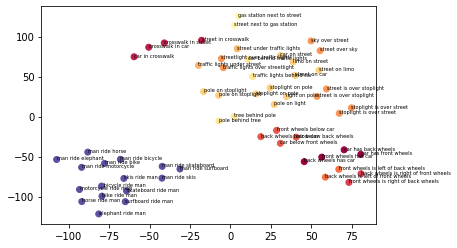

In [11]:
import matplotlib.pyplot as plt


fig,ax=plt.subplots()
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1],  c = label_id, cmap = plt.cm.Spectral) 
#ax.scatter(pca_embedding[:,0], pca_embedding[:,1], c = label_id, cmap = plt.cm.Spectral) 

for i in range(tsne.embedding_.shape[0]):
    # ax.annotate(str(id_to_rel[label_id[i]]),(tsne.embedding_[i][0], tsne.embedding_[i][1]), fontsize = 6) # triplet cluster by label
    ax.annotate(str(batch_sentences[i]),(tsne.embedding_[i][0], tsne.embedding_[i][1]), fontsize = 5) # triplet similarity by text 

# for i in range(pca_embedding.shape[0]):
#     ax.annotate(str(i),(pca_embedding[i][0], pca_embedding[i][1]))
plt.show()
#fig.savefig('triplet inverse.svg')

In [ ]:
for i in range(len(batch_sentences)):
    print(i, batch_sentences[i])